In [360]:
# -*- coding: utf-8 -*-

In [1]:
import pandas as pd

In [3]:
xx=pd.read_csv('12review.csv')
xx

,Unnamed: 0,name,mid,sex,time,zan,message
0,0,银鹿x,260474253.0,男,2021-11-07 04:11:38,31938.0,ShowMaker:我看见faker选手瘫坐在椅子上，最后一把我选择了faker选手的皮肤，...
1,1,艺术家菩提老仙儿,175948894.0,保密,2021-11-06 21:13:19,78682.0,也许有一天，我说也许，也许有一天，我们再次对英雄联盟电子竞技失去了信心。因为韩国的宰治，从四...
2,2,LPL战术小黑板,594534726.0,男,2021-11-07 01:13:41,46281.0,我们是冠军！！！！！！！！！！！！！！我们是冠军！！！！！！！！！！！！！！我们是冠军！！！...
3,3,晏九丿,53619780.0,男,2021-11-06 21:13:17,41785.0,骑士拔剑，攘除外敌，重建王朝。\n我懂了是亚瑟王传说！
4,4,bili_326291101,326291101.0,男,2021-11-07 01:31:30,17978.0,三个冠军队LCK围剿LPL？\n我TM直接穿死！\n兄弟，你是什么冠军？\n我是踩着三个冠军...
...,...,...,...,...,...,...,...
68119,19205,无题Daniel,5189750.0,保密,2021-11-07 01:09:22,0.0,我一看，第二局就输了，第三把没忍住点了下，后面一把没看[OK]
68120,19206,听说这个名字已被占用,2657753.0,保密,2021-11-07 01:38:26,0.0,何止估计连LOL都不玩
68121,19207,飞牛顿流体,519625475.0,男,2021-11-07 01:08:30,0.0,许秀：坏了，我又成faker了
68122,19208,咔璞・利亚斯,433982286.0,男,2021-11-07 01:20:25,0.0,dk打完t1那把，科黑给许秀贷款三连冠出来踩faker三冠的样子简直是小丑[吃瓜]


In [2]:
import locale
locale.setlocale(locale.LC_ALL, 'zh_CN.UTF-8')

'zh_CN.UTF-8'

In [3]:
import pandas as pd
import re
import numpy as np

In [3]:
datax=pd.read_csv('1levelreviewu.csv')
datay=pd.read_csv('2levelreviewu.csv')

In [8]:
data=pd.read_csv('12review.csv',encoding='utf-8')

In [5]:
net=pd.read_csv('networku.csv')

In [ ]:
network=pd.read_csv('network2.csv') #一级评论和二级评论全部的边表格

# tdidf

In [6]:
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib
import os
import re
import numpy as np
import jieba.posseg as psg
import networkx as nx
import pandas as pd
import math

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdo

In [16]:
data['message']=data['message'].fillna('')
data[data['message']!='']

,Unnamed: 0,name,mid,sex,time,zan,message
0,0,银鹿x,260474253.0,男,2021-11-07 04:11:38,31938.0,我看见选手瘫坐在椅子上最后一把我选择了选手的皮肤果不其然我也瘫坐在椅子上了
1,1,艺术家菩提老仙儿,175948894.0,保密,2021-11-06 21:13:19,78682.0,也许有一天我说也许也许有一天我们再次对英雄联盟电子竞技失去了信心因为韩国的宰治从四强赛看来已...
2,2,LPL战术小黑板,594534726.0,男,2021-11-07 01:13:41,46281.0,我们是冠军我们是冠军我们是冠军我们是冠军我们是冠军我们是冠军
3,3,晏九丿,53619780.0,男,2021-11-06 21:13:17,41785.0,骑士拔剑攘除外敌重建王朝我懂了是亚瑟王传说
4,4,bili_326291101,326291101.0,男,2021-11-07 01:31:30,17978.0,三个冠军队围剿我直接穿死兄弟你是什么冠军我是踩着三个冠军拿的冠军
...,...,...,...,...,...,...,...
68119,19205,无题Daniel,5189750.0,保密,2021-11-07 01:09:22,0.0,我一看第二局就输了第三把没忍住点了下后面一把没看
68120,19206,听说这个名字已被占用,2657753.0,保密,2021-11-07 01:38:26,0.0,何止估计连都不玩
68121,19207,飞牛顿流体,519625475.0,男,2021-11-07 01:08:30,0.0,许秀坏了我又成了
68122,19208,咔璞・利亚斯,433982286.0,男,2021-11-07 01:20:25,0.0,打完那把科黑给许秀贷款三连冠出来踩三冠的样子简直是小丑


In [20]:
data['message']=data['message'].str.replace("回复 @[^:]+ :", "", regex=True) #去除回复
data['message']=data['message'].str.replace("\[([^\[\]]{2,10})\]", "", regex=True) #去除表情包
data['message']=data.message.str.replace(r'[^\u4e00-\u9fa5]+', '')  #文本正则
from jieba import analyse
text=data['message'].tolist()
text1=','.join(text)
tags = analyse.extract_tags(text1, topK=20, withWeight=True, allowPOS=())

In [24]:
tag=pd.DataFrame(tags)

In [25]:
tag.columns=['关键词','权重']
tag.to_excel('tag.xlsx')

# 计算lda概率

In [84]:
lda=pd.read_excel('ldapxsample.xlsx')

In [85]:
lda.value=lda.value.apply(lambda x: np.array(list(map(float, x.strip("[]").split()))))

In [86]:
topics = lda.value.values
n = topics.shape[0]

# 计算用户i的内容倾向性

In [278]:
import numpy as np
import pandas as pd

# 假设你有ldaname数据
ldaname = {
    'name': ['艺术家菩提老仙儿', 'LPL战术小黑板', '晏九丿', '艺术家菩提老仙儿'],
    'value': [
        np.array([0.00444444, 0.00444895, 0.00444543, 0.00444668, 0.96443421, 0.00444473, 0.00444517, 0.0044459, 0.00444449]),
        np.array([0.01587302, 0.01587302, 0.01587302, 0.87301587, 0.01587302, 0.01587302, 0.01587302, 0.01587302, 0.01587302]),
        np.array([0.37037169, 0.03703704, 0.03703704, 0.03706283, 0.37033718, 0.03703704, 0.03703747, 0.03704268, 0.03703704]),
        np.array([0.01587302, 0.01587303, 0.01587402, 0.87301687, 0.01588302, 0.01587302, 0.01587302, 0.01587302, 0.01587302])
    ]
}

ldaname = pd.DataFrame(ldaname)
print(ldaname)
# 自定义聚合函数，将用户的内容偏向合并为一个数组
def aggregate_values(arr):
    return np.mean(arr.tolist(), axis=0)

# 应用自定义聚合函数计算每个用户的平均倾向
grouped_ldaname = ldaname.groupby('name')['value'].apply(aggregate_values).reset_index()
#print(grouped_ldaname)
# 计算每个用户的平均倾向
grouped_ldaname['average_leaning'] = grouped_ldaname['value'].apply(lambda x: np.mean(x))

print(grouped_ldaname[['name', 'average_leaning']])


       name                                              value
0  艺术家菩提老仙儿  [0.00444444, 0.00444895, 0.00444543, 0.0044466...
1  LPL战术小黑板  [0.01587302, 0.01587302, 0.01587302, 0.8730158...
2       晏九丿  [0.37037169, 0.03703704, 0.03703704, 0.0370628...
3  艺术家菩提老仙儿  [0.01587302, 0.01587303, 0.01587402, 0.8730168...
       name  average_leaning
0  LPL战术小黑板         0.111111
1       晏九丿         0.111111
2  艺术家菩提老仙儿         0.111112


In [396]:
ldaname=pd.read_csv('datatopicvalueyuan.csv',encoding='utf-8')#读取具备文档主题分布概率的文件
ldaname=pd.concat([ldaname['name'],ldaname['value']],axis=1)
ldaname.value=ldaname.value.apply(lambda x: np.array(list(map(float, x.strip("[]").split()))))#变为矩阵
ldaname.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48891 entries, 0 to 48890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    48891 non-null  object
 1   value   48891 non-null  object
dtypes: object(2)
memory usage: 764.0+ KB


In [345]:
#ldaname.groupby("name", as_index=False).agg({"xi":"mean"})

In [367]:
def aggregate_values(arr):
    return np.mean(arr.tolist(), axis=0)

# 应用自定义聚合函数计算每个用户的平均倾向
grouped_ldaname = ldaname.groupby('name')['value'].apply(aggregate_values).reset_index()
# 计算每个用户的平均倾向
grouped_ldaname['average_leaning'] = grouped_ldaname['value'].apply(lambda x: np.mean(x))#计算出来每个用户的平均倾向
#print(grouped_ldaname[['name', 'average_leaning']])

In [365]:
grouped_ldaname.to_csv('groupname.csv')#个人的平均倾向性

# 计算邻居的内容倾向性

In [431]:
import networkx as nx

In [432]:
df=pd.read_csv('network2.csv')#读取全部的边表格

In [466]:
import pandas as pd
import networkx as nx

# 假设你有边列表数据框 edges_df 和用户内容偏向性数据框 xi_df

# 创建边列表数据框
edges_df = pd.DataFrame({
    'source': ['user1', 'user1', 'user2', 'user3', 'user3', 'user4'],
    'target': ['user2', 'user3', 'user4', 'user1', 'user4', 'user1']
})
edges_df=df
# 创建用户内容偏向性数据框
xi_df = pd.DataFrame({
    'user': ['user1', 'user2', 'user3', 'user4'],
    'xi': [0.5, 0.7, 0.3, 0.8]
})
xi_df=grouped_ldaname
xi_df.columns=['user','value','xi']
# 创建有向图
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', create_using=nx.DiGraph())
# 计算每个节点的出度
out_degree = dict(G.out_degree())
# 初始化一个字典用于存储每个节点的邻居的内容偏向性总和和出度
neighbor_sum = {}
neighbor_count = {}
num_nodes = G.number_of_nodes()


In [467]:
# 遍历每个节点
for node in G.nodes:
    # 如果节点有出度
    if out_degree.get(node, 0) > 0:
        neighbors = G.successors(node)
        for neighbor in neighbors:
            #print(neighbor)
            # 更新邻居总和和邻居出度
            if node in xi_df['user'].values:
                if node not in neighbor_sum:
                    neighbor_sum[node] = 0
                    neighbor_count[node] = 0#在循环中，对于每个节点，都会检查它是否在 neighbor_sum 字典中。如果不在，说明这是第一次遇到这个节点，因此需要将其初始化为0。如果已经在字典中，就保持不变。
#这样做的原因是，在循环的后续部分，会根据每个邻居的内容偏向性更新 neighbor_sum 和 neighbor_count。如果不进行初始化，那么第一次遇到一个节点时，字典中不会有这个节点的信息，就无法进行累加操作。所以，这段代码确保在循环中始终有一个干净的状态，可以正确地更新节点的邻居总和和邻居出度。
                matching_rows = xi_df.loc[xi_df['user'] == neighbor, 'xi']
                if not matching_rows.empty:
                    neighbor_sum[node] += matching_rows.values[0]
                    neighbor_count[node] += 1
                #else:
                  #  print(f"No matching rows for neighbor {neighbor} of node {node}")
                else:
                    # 如果 matching_rows 为空，将邻居节点的内容偏向值记为 0
                    neighbor_sum[node] += 0
                    neighbor_count[node] += 1


In [454]:
# 计算每个节点的邻居平均内容偏向性
average_xiN = {}
for node in neighbor_sum:
    average_xiN[node] = neighbor_sum[node] / neighbor_count[node] if neighbor_count[node] > 0 else 0

# 打印结果
#print("邻居平均内容偏向性:")
#print(average_xiN)



In [468]:
result_df = pd.DataFrame(list(average_xiN.items()), columns=['Node', 'Average_xiN'])
result_df.to_csv('neighbour.csv')

In [4]:
result_df=pd.read_csv('neighbour.csv')
grouped_ldaname=pd.read_csv('groupname.csv')

In [5]:
merged_df = pd.merge(result_df, grouped_ldaname,left_on='Node', right_on='name', how='outer')
mergeddf=merged_df.dropna(subset=['Node'])#最终邻居倾向性与个人倾向性的合表

In [9]:
mergeddf.describe()

,Unnamed: 0_x,Average_xiN,Unnamed: 0_y,average_leaning
count,5067.000000,5067.000000,5067.000000,5.067000e+03
mean,2533.000000,0.103871,15975.519440,1.111111e-01
std,1462.861237,0.023321,9194.110177,1.471029e-09
min,0.000000,0.000000,0.000000,1.111111e-01
25%,1266.500000,0.111111,8009.500000,1.111111e-01
50%,2533.000000,0.111111,16002.000000,1.111111e-01
75%,3799.500000,0.111111,24060.500000,1.111111e-01
max,5066.000000,0.111111,31872.000000,1.111111e-01


# px和pxn作图

In [19]:
individual_distribution = mergeddf['average_leaning'].to_numpy()
neighbor_distribution=mergeddf['Average_xiN'].to_numpy()

In [20]:
import matplotlib.pyplot as plt

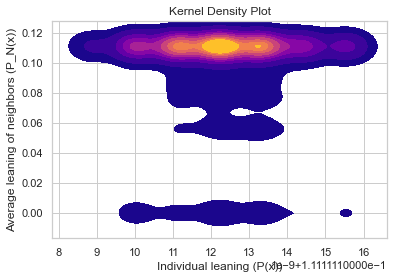

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have data for individual leaning and neighbor leaning
# Replace the following with your actual data

# Combine data into a DataFrame for seaborn
data = {'Individual Leaning (P(x))': individual_distribution, 'Neighbor Leaning (P_N(x))': neighbor_distribution}
df = pd.DataFrame(data)

# Set seaborn style
sns.set(style="whitegrid")

# Create a kernel density plot
sns.kdeplot(data=df, x="Individual Leaning (P(x))", y="Neighbor Leaning (P_N(x))", fill=True, cmap="plasma")



# Add labels and title
plt.xlabel('Individual leaning (P(x))')
plt.ylabel('Average leaning of neighbors (P_N(x))')
plt.title('Kernel Density Plot')

# Show the plot
plt.show()


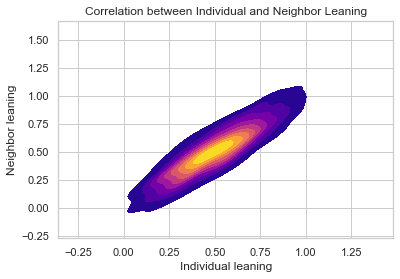

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 生成虚构的个人用户内容偏向和邻居内容偏向的概率分布数据
np.random.seed(42)

# 生成个人用户的内容偏向数据（示例）
individual_distribution = np.random.normal(loc=0.5, scale=0.2, size=500)

# 生成邻居的内容偏向数据，假设受到个人用户内容偏向的影响
neighbor_distribution = individual_distribution + np.random.normal(loc=0, scale=0.1, size=500)

# 合并数据为DataFrame
import pandas as pd
df = pd.DataFrame({'Individual Leaning': individual_distribution, 'Neighbor Leaning': neighbor_distribution})

# 设置 seaborn 风格
sns.set(style="whitegrid")

# 创建核密度图
sns.kdeplot(data=df, x="Individual Leaning", y="Neighbor Leaning", fill=True, cmap="plasma")

# 添加标签和标题
plt.xlabel('Individual leaning')
plt.ylabel('Neighbor leaning')
plt.title('Correlation between Individual and Neighbor Leaning')

# 显示图形
plt.show()


KeyboardInterrupt: 

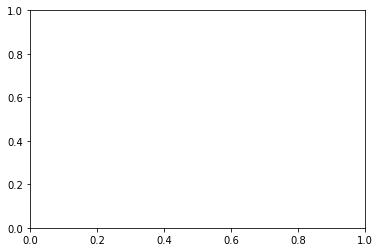

In [14]:

x = np.linspace(0, 0.2, len(individual_distribution))
y = np.linspace(0, 0.2, len(neighbor_distribution))

# 将网格转化为二维数组
X, Y = np.meshgrid(x, y)
# 绘制 contour map
plt.contourf(X, Y, np.outer(individual_distribution, neighbor_distribution), levels=200,cmap='plasma')

# 添加标签和标题
plt.xlabel('Individual leaning (P(x))')
plt.ylabel('Average leaning of neighbors (P_N(x))')
plt.title('Probability Distributions Contour Map')

# 显示颜色栏
plt.colorbar()

# 显示图形
plt.show()



<AxesSubplot:>

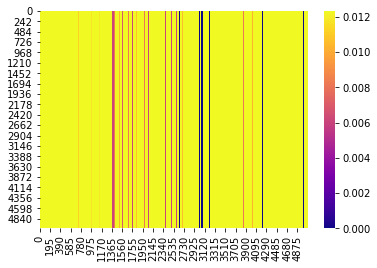

In [15]:
import seaborn as sns

sns.heatmap(np.outer(individual_distribution, neighbor_distribution), cmap='plasma', cbar=True)


# 举例计算邻居倾向性

In [423]:
import pandas as pd

# 创建虚拟数据
data = {'user': ['A', 'B', 'C', 'D', 'E'],
        'xi': [0.1, 0.2, 0.3, 0.4, 0.5]}
xi_df = pd.DataFrame(data)

# 假设节点A有出度到B、C、D
out_degree = {'A': 3, 'B': 0, 'C': 0, 'D': 0, 'E': 0}

# 初始化一个字典用于存储每个节点的邻居的内容偏向性总和和出度
neighbor_sum = {}
neighbor_count = {}

for node in out_degree:
    # 如果节点有出度
    if out_degree.get(node, 0) > 0:
        neighbors = ['B', 'C', 'D']  # 假设A的邻居是B、C、D
        for neighbor in neighbors:
            # 更新邻居总和和邻居出度
            if node in xi_df['user'].values:
                if node not in neighbor_sum:
                    neighbor_sum[node] = 0
                    neighbor_count[node] = 0

                matching_rows = xi_df.loc[xi_df['user'] == neighbor, 'xi']
                if not matching_rows.empty:
                    neighbor_sum[node] += matching_rows.values[0]
                    print(node,neighbor_sum[node])
                    neighbor_count[node] += 1

# 打印结果
print("邻居总和:", neighbor_sum)
print("邻居出度:", neighbor_count)


A 0.2
A 0.5
A 0.9
邻居总和: {'A': 0.9}
邻居出度: {'A': 3}
